In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\a_lag\Desktop\gthub\EDA_TEAM PROJECT\stroke_prediction_analysis\cleaning\healthcare-dataset-stroke-data_clean.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4905,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
#Replacing 'Yes' and 'No' with 1 and 0 for better analysis
df['ever_married'] = df['ever_married'].replace('Yes',1).replace('No',0)

C:\Users\a_lag\AppData\Local\Temp\ipykernel_21144\2591963232.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ever_married'] = df['ever_married'].replace('Yes',1).replace('No',0)


In [5]:
df[df['stroke']==1]['stroke'].sum()/len(df)*100

4.257486249745366

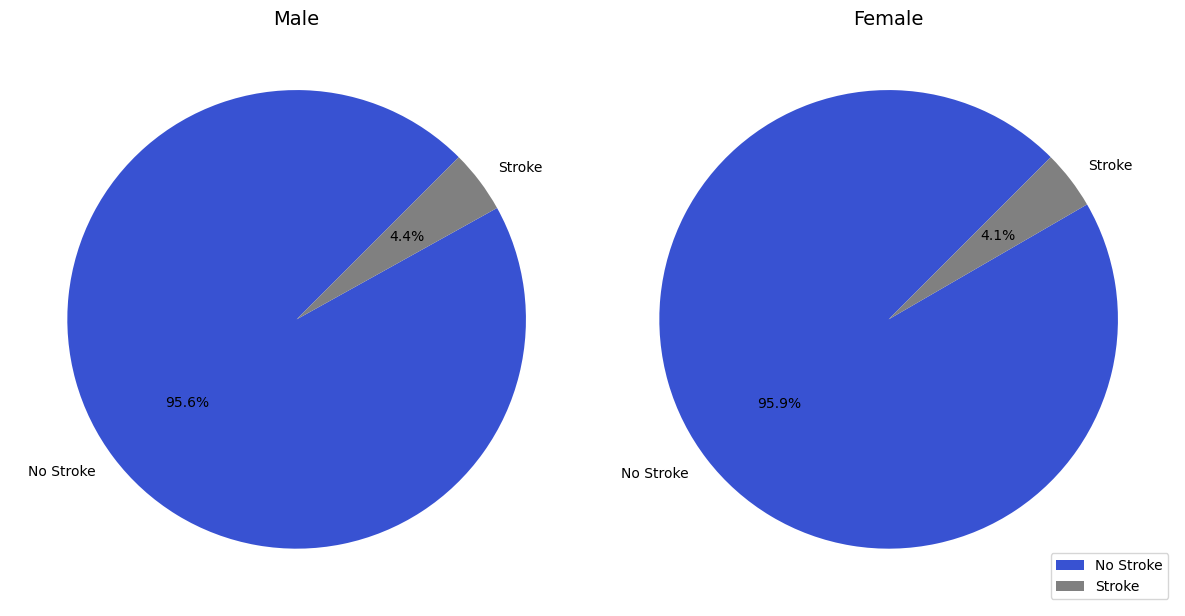

In [6]:
#by gender
fig,ax = plt.subplots(1,2,figsize=(12,8))

color1 = ['#3852D2','gray']
title =  "Stroke Distribution by Gender"

#Male pie chart
ax[0].pie(x=df.loc[df['gender']=='Male']['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)

ax[0].set_title("Male", fontsize=14)


#Female pie chart
ax[1].pie(x=df.loc[df['gender']=='Female']['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)

ax[1].set_title("Female", fontsize=14)
ax[1].legend(['No Stroke', 'Stroke'], loc='lower right', fontsize=10)


plt.tight_layout()
plt.show()
fig.savefig('stroke_perc_by_gender.png')

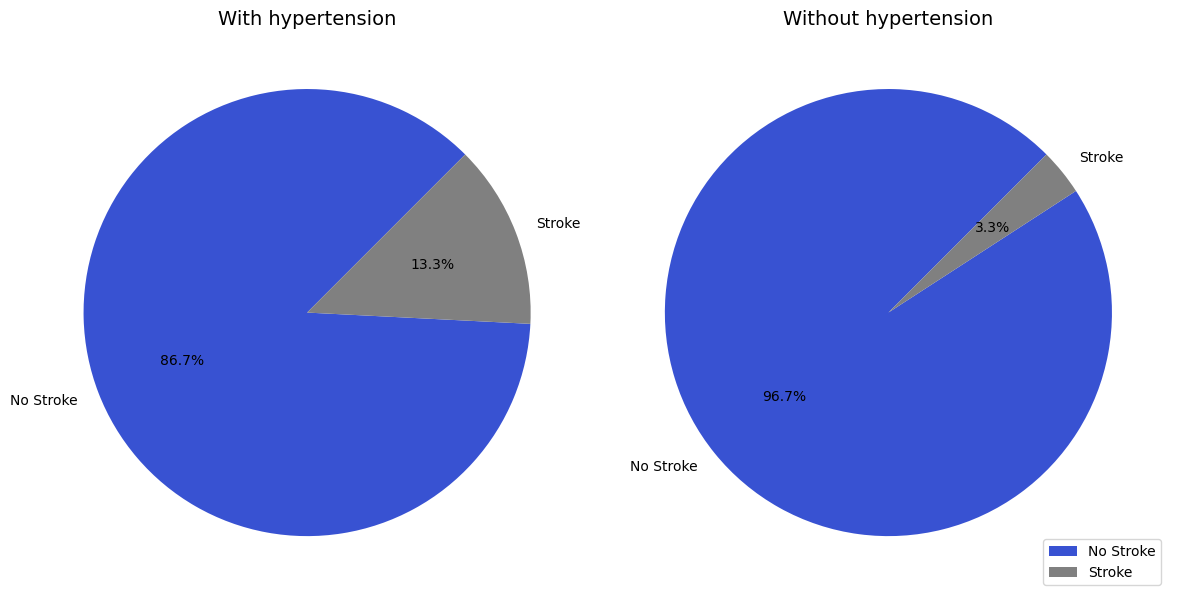

In [7]:
#by hypertension
fig,ax = plt.subplots(1,2,figsize=(12,8))

color1 = ['#3852D2','gray']
title =  "Stroke Distribution by Hypertension"

#With hypertension
ax[0].pie(x=df.loc[df['hypertension']==1]['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[0].set_title("With hypertension", fontsize=14)


#Without hypertension
ax[1].pie(x=df.loc[df['hypertension']==0]['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)
ax[1].set_title("Without hypertension", fontsize=14)
ax[1].legend(['No Stroke', 'Stroke'], loc='lower right', fontsize=10)


plt.tight_layout()
plt.show()
fig.savefig('stroke_perc_by_hypertension.png')

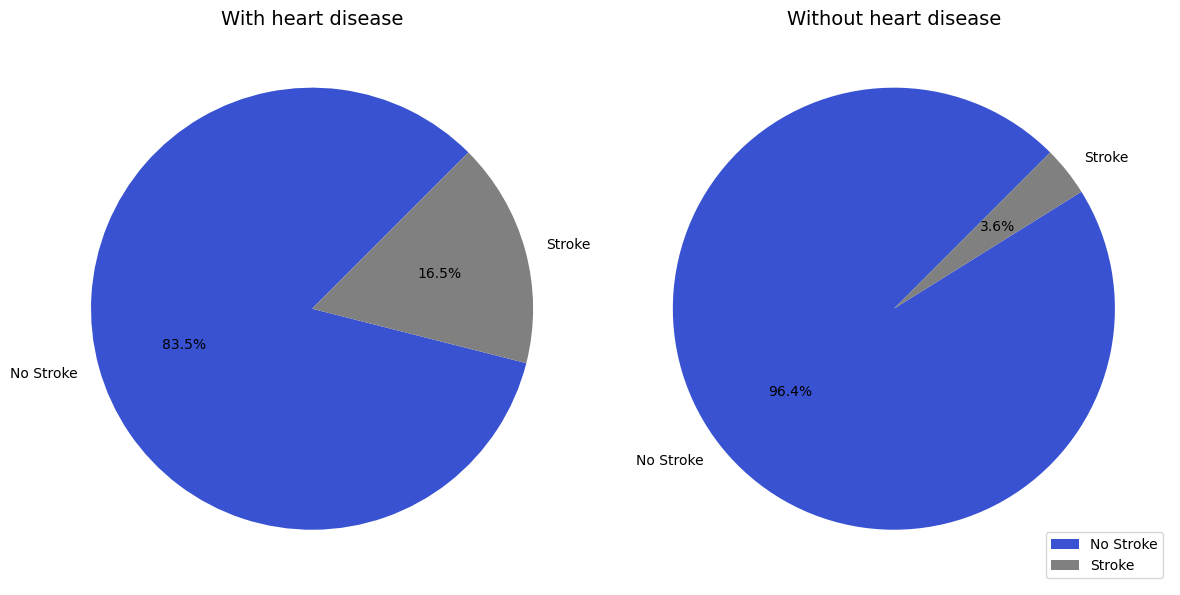

In [8]:
#by heart disease
fig,ax = plt.subplots(1,2,figsize=(12,8))

color1 = ['#3852D2','gray']
title =  "Stroke Distribution by Hypertension"

#With heart disease
ax[0].pie(x=df.loc[df['heart_disease']==1]['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)

ax[0].set_title("With heart disease", fontsize=14)

#Without heart disease
ax[1].pie(x=df.loc[df['heart_disease']==0]['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)

ax[1].set_title("Without heart disease", fontsize=14)
ax[1].legend(['No Stroke', 'Stroke'], loc='lower right', fontsize=10)


plt.tight_layout()
plt.show()
fig.savefig('stroke_perc_by_heartdisease.png')

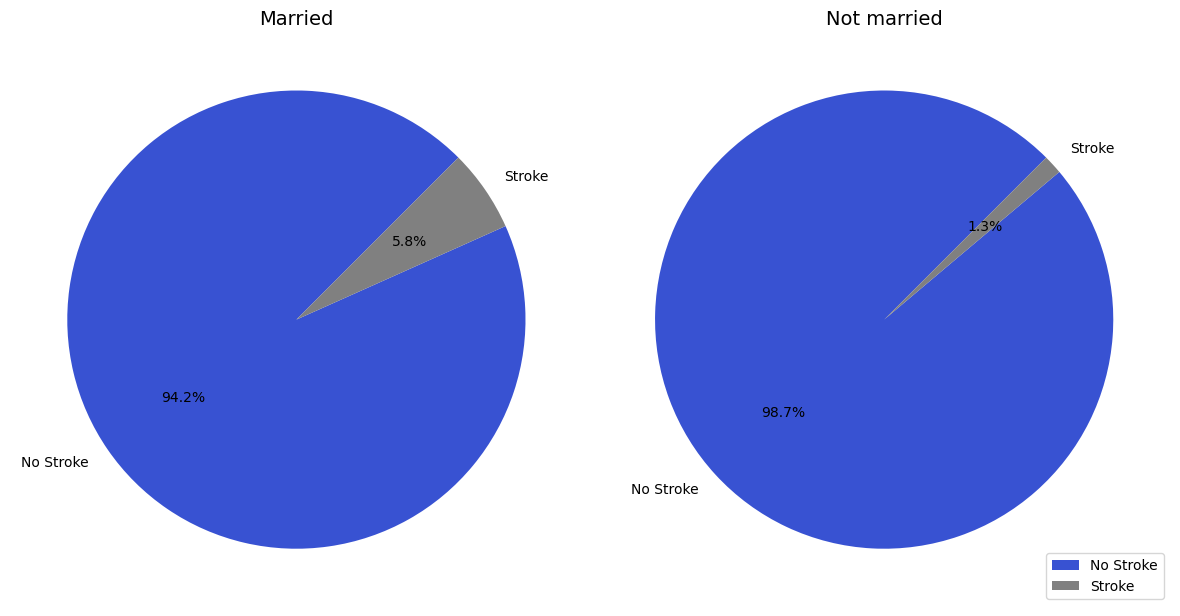

In [9]:
#by ever married
fig,ax = plt.subplots(1,2,figsize=(12,8))

color1 = ['#3852D2','gray']
title =  "Stroke Distribution by Hypertension"

#Married
ax[0].pie(x=df.loc[df['ever_married']==1]['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)

ax[0].set_title("Married", fontsize=14)

#Not married
ax[1].pie(x=df.loc[df['ever_married']==0]['stroke'].value_counts(),
        labels=['No Stroke','Stroke'],startangle=45,
        autopct='%1.1f%%',colors=color1)

ax[1].set_title("Not married", fontsize=14)
ax[1].legend(['No Stroke', 'Stroke'], loc='lower right', fontsize=10)


plt.tight_layout()
plt.show()
fig.savefig('stroke_perc_by_evermarried.png')

In [10]:
#strokes and bmi
sns.violinplot(x='stroke', y='bmi',data=df, hue='gender', split=True, inner="quart").set_title('BMI distributions')

plt.savefig('stroke_dist_by_gender_bmi.png')

ValueError: There must be exactly two hue levels to use `split`.'

In [11]:
#strokes and glucose levels
sns.violinplot(x='stroke', y='avg_glucose_level',data=df, hue='gender', split=True, inner="quart").set_title('Average glucose levels distributions')

plt.savefig('stroke_dist_by_gender_glucose.png')

ValueError: There must be exactly two hue levels to use `split`.'

In [12]:
#strokes and age
sns.violinplot(x='stroke', y='age',data=df, hue='gender', split=True, inner="quart").set_title('Age distributions')

plt.legend(loc='lower right')
plt.savefig('stroke_dist_by_gender_age.png')

ValueError: There must be exactly two hue levels to use `split`.'

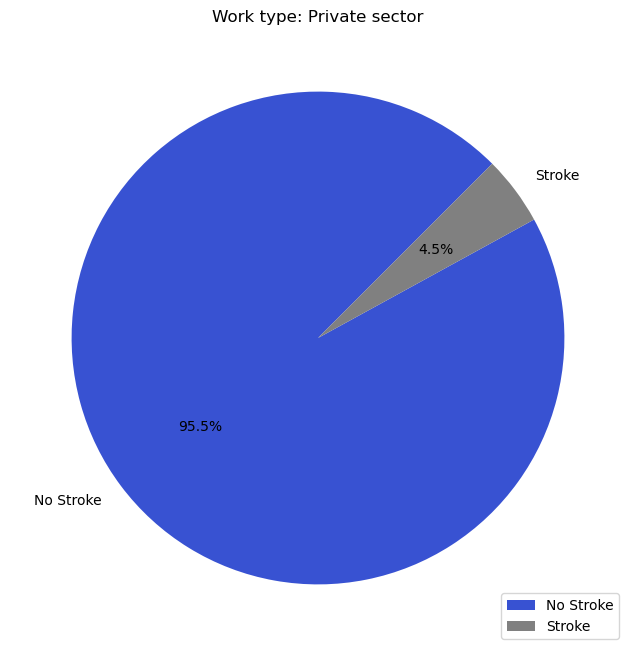

In [13]:
#by work_type = 'Private'
df_private = df[df['work_type'] == 'Private']

# Count occurrences of strokes and no strokes
stroke_counts = df_private['stroke'].value_counts()

labels = ['No Stroke', 'Stroke']
colors = ['#3852D2','gray']  

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(stroke_counts, labels=labels, autopct='%1.1f%%', startangle=45, colors=colors)
ax.set_title('Work type: Private sector')
ax.legend(['No Stroke', 'Stroke'], loc='lower right', fontsize=10)



fig.savefig('stroke_perc_private_sector.png')


plt.show()

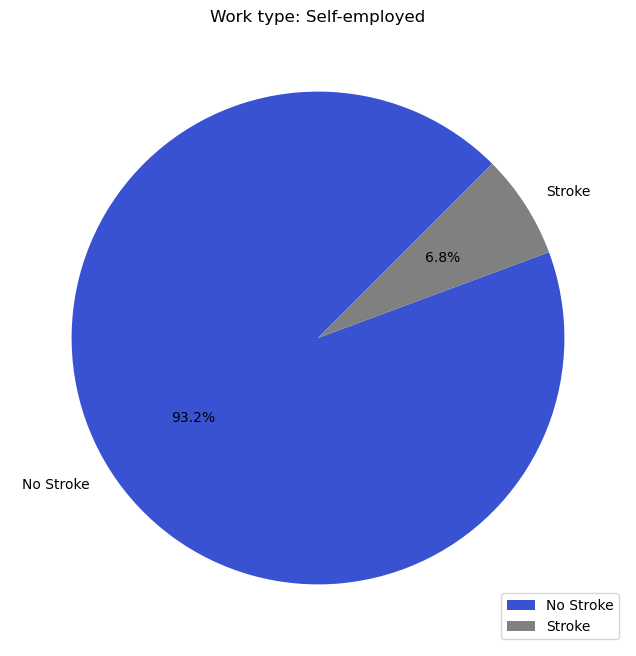

In [14]:
#by work_type = 'Self-employed'
df_self_emp = df[df['work_type'] == 'Self-employed']

# Count occurrences of strokes and no strokes
stroke_counts = df_self_emp['stroke'].value_counts()


labels = ['No Stroke', 'Stroke']
colors = ['#3852D2','gray']  


fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(stroke_counts, labels=labels, autopct='%1.1f%%', startangle=45, colors=colors)
ax.set_title('Work type: Self-employed')
ax.legend(['No Stroke', 'Stroke'], loc='lower right', fontsize=10)

fig.savefig('stroke_perc_self_emp.png')

plt.show()

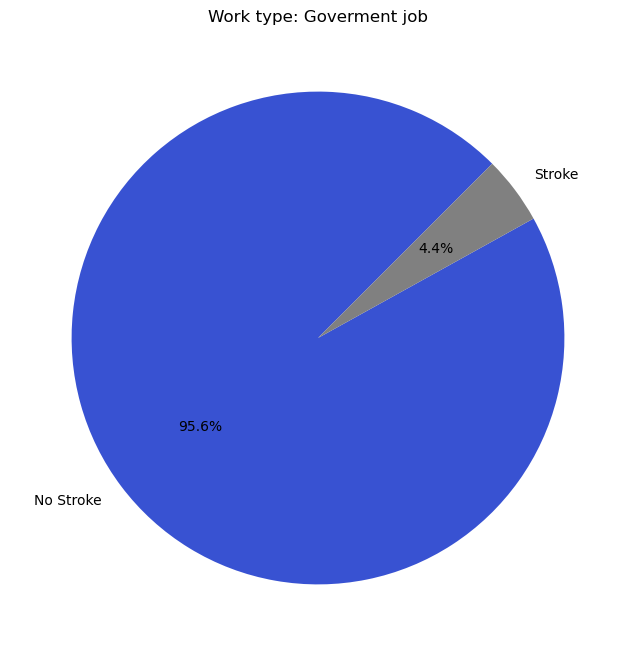

In [15]:
#by work_type = 'Govt_job'
df_gov = df[df['work_type'] == 'Govt_job']

# Count occurrences of strokes and no strokes
stroke_counts = df_gov['stroke'].value_counts()


labels = ['No Stroke', 'Stroke']
colors = ['#3852D2','gray']


fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(stroke_counts, labels=labels, autopct='%1.1f%%', startangle=45, colors=colors)
ax.set_title('Work type: Goverment job')

fig.savefig('stroke_perc_gov.png')

plt.show()

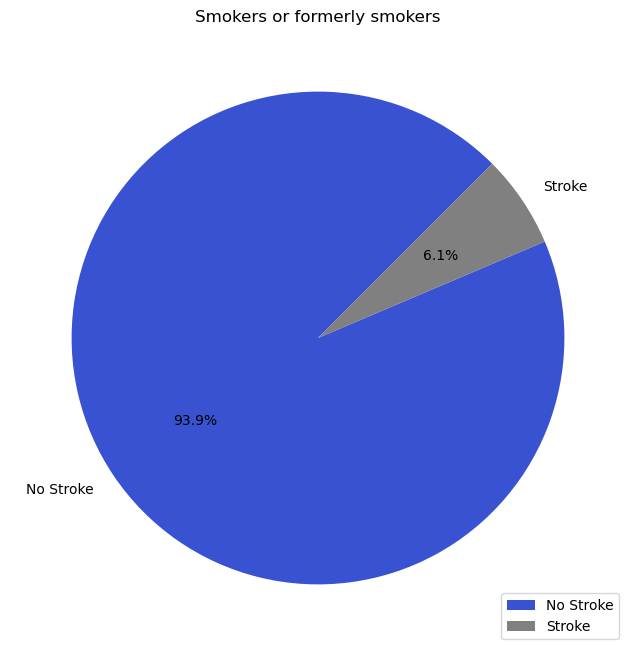

In [16]:
#by smoking_status = 'formerly smoked' or 'smokes'
df_smokers = df[(df['smoking_status'] == 'formerly smoked') | (df['smoking_status'] == 'smokes')]

# Count occurrences of strokes and no strokes
stroke_counts = df_smokers['stroke'].value_counts()


labels = ['No Stroke', 'Stroke']
colors = ['#3852D2','gray']


fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(stroke_counts, labels=labels, autopct='%1.1f%%', startangle=45, colors=colors)
ax.set_title('Smokers or formerly smokers')
ax.legend(['No Stroke', 'Stroke'], loc='lower right', fontsize=10)

fig.savefig('stroke_perc_smokers.png')

plt.show()

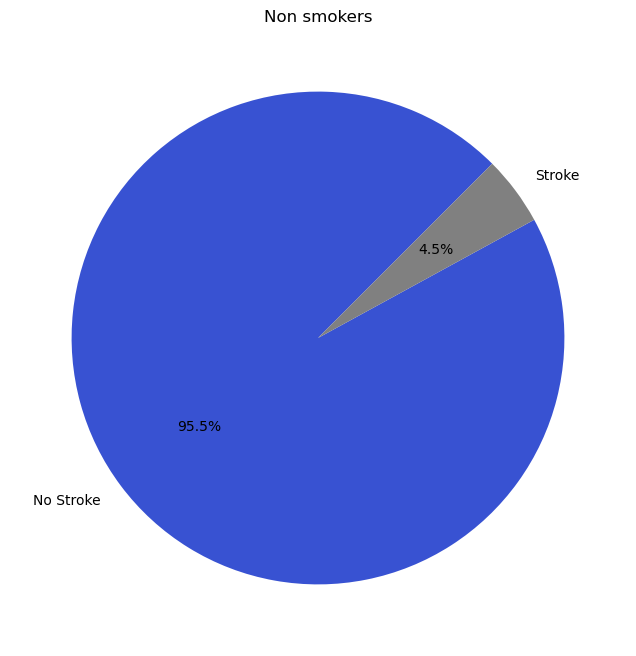

In [17]:
#by smoking_status = 'never smoked'
df_non_smokers = df[df['smoking_status'] == 'never smoked']

# Count occurrences of strokes and no strokes
stroke_counts = df_non_smokers['stroke'].value_counts()

labels = ['No Stroke', 'Stroke']
colors = ['#3852D2','gray'] 

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(stroke_counts, labels=labels, autopct='%1.1f%%', startangle=45, colors=colors)
ax.set_title('Non smokers')

fig.savefig('stroke_perc_non_smokers.png')

plt.show()

### Work in progress (creating a heatmap)

In [18]:
dfd = pd.get_dummies(df, ['gender','ever_married', 'work_type','Residence_type', 'smoking_status'], drop_first = True)

ValueError: Length of 'prefix' (5) did not match the length of the columns being encoded (4).

In [20]:
dfnew = pd.get_dummies(df, columns = ['gender','ever_married', 'work_type','Residence_type', 'smoking_status'], drop_first = False)

In [22]:
dfnew2 = dfnew.drop(df.columns[0],axis=1)

In [25]:
corr = dfnew2.corr()

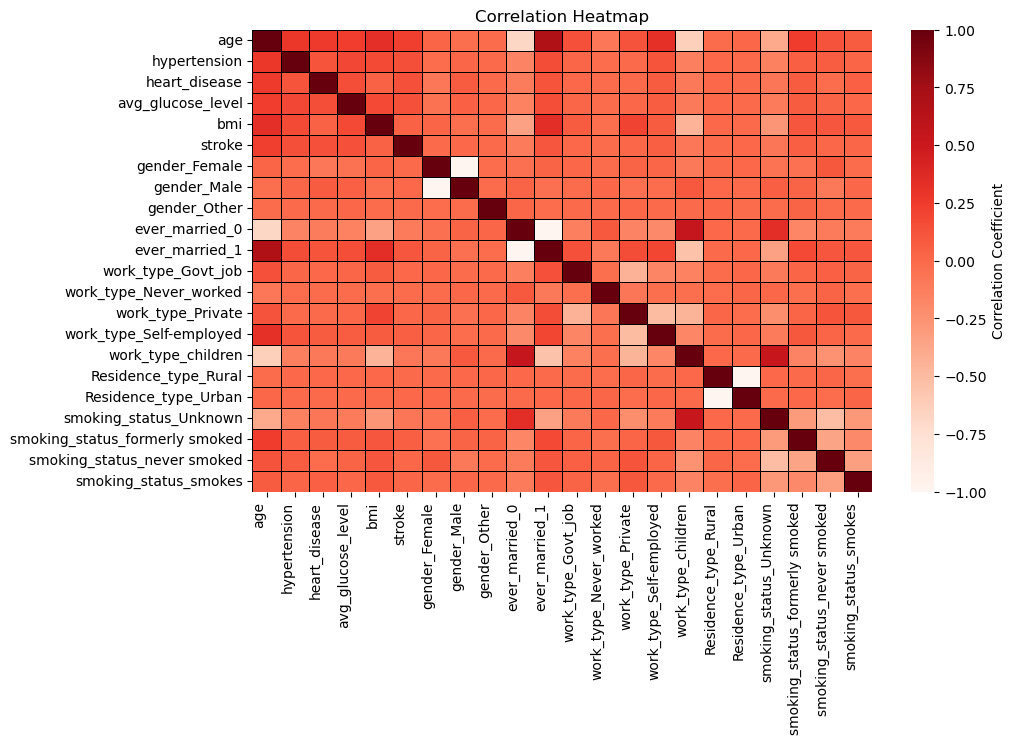

In [27]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr, cmap="Reds", annot=False, fmt=".2f", linewidths=0.5, linecolor='black', cbar_kws={'label': 'Correlation Coefficient'})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title('Correlation Heatmap')
plt.show()